In [190]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# TODO: ver que onda los warnings
import warnings
warnings.filterwarnings('ignore')


plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn
def plot_heatmap(df, x, y, z, label_x='x', label_y='y', label_z='z', title='titulo', color='hot_r', invert_color=False):
    fig, ax = plt.subplots(figsize=(14,14))
    graph = sns.heatmap(df.pivot_table(index=y,columns=x,values=z),\
    linewidths=.5,cmap=color, ax=ax, cbar_kws={'label': label_z}, annot=False)
    ax.set_xlabel(label_x);
    ax.set_ylabel(label_y);
    ax.set_title(title)
    if invert_color:
        ax.invert_yaxis()

In [2]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category",
}
parse_dates = ['timestamp']
df_events = pd.read_csv('./fiuba-trocafone-tp1-final-set/events.csv', dtype=types, low_memory=False, parse_dates=parse_dates)

In [3]:
df_events['year'] = df_events['timestamp'].dt.year
df_events['month'] = df_events['timestamp'].dt.month
df_events['day'] = df_events['timestamp'].dt.day
df_events['time'] = df_events['timestamp'].dt.time

In [4]:
df_events.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'year', 'month', 'day',
       'time'],
      dtype='object')

In [155]:
df_events

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,country,device_type,screen_resolution,operating_system_version,browser_version,year,month,day,time,colores_posta
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,5,31,23:38:05,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,2018,5,31,23:38:05,NaN
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,5,31,23:38:09,Cinza espacial
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,5,31,23:38:40,Cinza espacial
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,5,29,13:29:25,Dourado
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1,2018,5,29,13:29:26,NaN
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,5,29,13:29:27,NaN
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,2018,5,29,13:29:35,Dourado
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",...,NaN,NaN,NaN,NaN,NaN,2018,4,9,20:12:31,NaN
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0,2018,4,9,20:12:31,NaN


In [30]:
df_events['event'].describe()

count            1011288
unique                11
top       viewed product
freq              528931
Name: event, dtype: object

#### Como hay solo 11 valores distintos lo tomo como un categorico

In [51]:
df_events['model'].describe()

count       564284
unique         202
top       iPhone 6
freq         50916
Name: model, dtype: object

#### Como hay solo 202 valores distintos, pero se contaron 564284 valores, lo tomo como un categorico

# Hora pico del uso de la pagina semanalmente.

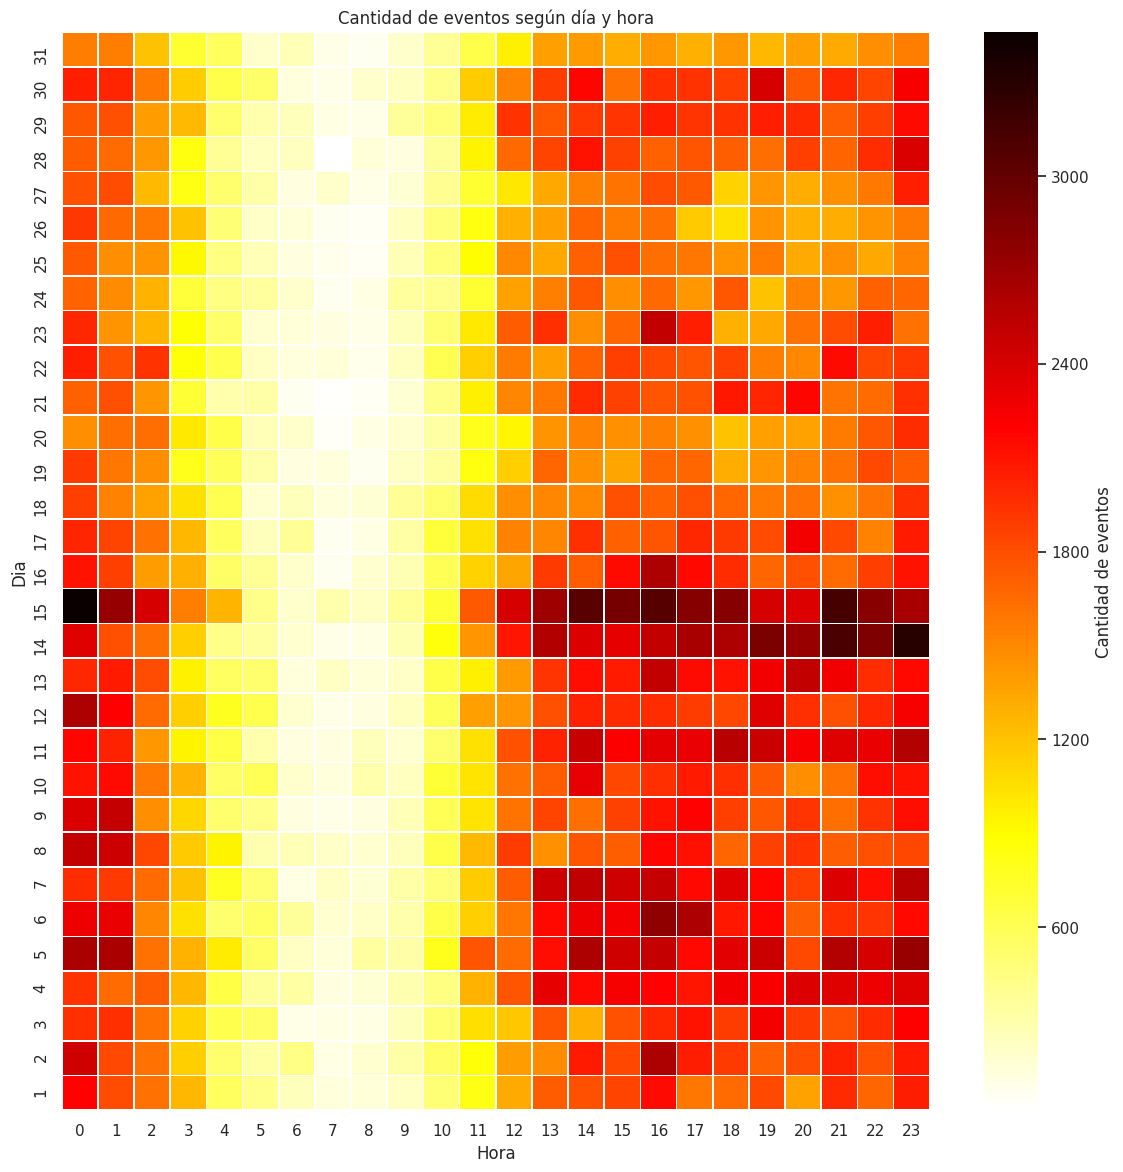

In [62]:
df_horaPico = df_events[['timestamp', 'day', 'event']]
df_horaPico['hour'] = df_horaPico['timestamp'].dt.hour
df_horaPico.drop('timestamp', axis='columns', inplace=True)
df_horaPico = df_horaPico.groupby(['hour', 'day']).agg({'day':'count'})
df_horaPico.columns = ['count']
df_horaPico.reset_index(inplace=True)
df_horaPico

plot_heatmap(df_horaPico,  x='hour', y='day', z='count', title='Cantidad de eventos según día y hora', label_x='Hora',label_y='Dia',label_z='Cantidad de eventos',invert_color=True)

In [64]:
df_horaPico = df_events[['timestamp', 'day', 'event']]
df_horaPico['hour'] = df_horaPico['timestamp'].dt.hour
df_horaPico.drop('timestamp', axis='columns', inplace=True)
df_horaPico.groupby('event')
# df_horaPico = df_horaPico.groupby(['hour', 'day']).agg({'day':'count'})


In [168]:
df_checkouts = df_horaPico[df_horaPico['event']=='checkout']
checkouts_ser = df_checkouts.groupby('hour').agg({'event': 'count'})
checkouts_ser.reset_index(inplace=True)
checkouts_ser.columns = ['hour', 'count']

df_viewed = df_horaPico[df_horaPico['event']=='viewed product']
viewed_ser = df_viewed.groupby('hour').agg({'event': 'count'})
viewed_ser.reset_index(inplace=True)
viewed_ser.columns = ['hour','count']

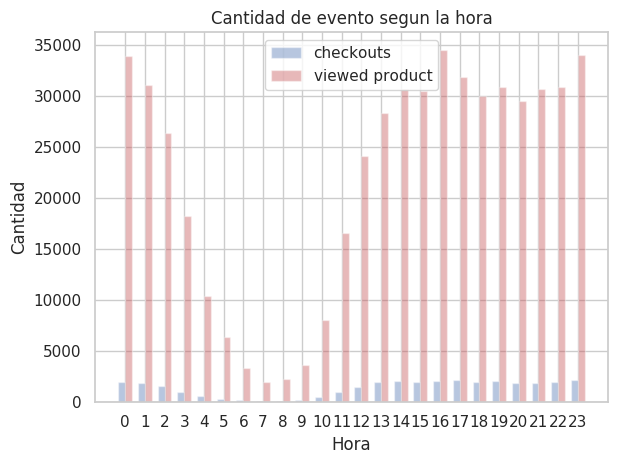

In [202]:
index = viewed_ser['hour'].values

fig, ax = plt.subplots()
bar_width = 0.35

opacity = 0.4

rects1 = ax.bar(index, checkouts_ser['count'].values, bar_width,
                alpha=opacity, color='b',
                label='checkouts')

rects2 = ax.bar(index + bar_width, viewed_ser['count'].values, bar_width,
                alpha=opacity, color='r',
                label='viewed product')

ax.set_xlabel('Hora')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de evento segun la hora')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index)
ax.legend()

fig.tight_layout()
plt.show()

In [178]:
(viewed_ser['count']/checkouts_ser['count']).mean()

15.544905975188136

## La relacion entre visitas y compras es de 15.54 en promedio

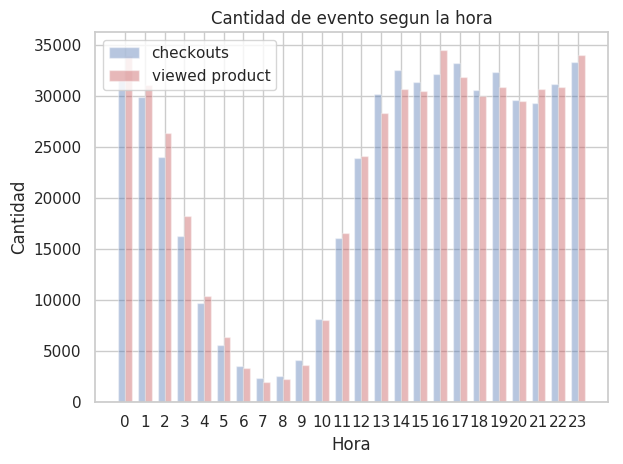

In [201]:
index = viewed_ser['hour'].values

fig, ax = plt.subplots()
bar_width = 0.35

opacity = 0.4

rects1 = ax.bar(index, checkouts_ser['count'].values * 15.544905975188136, bar_width,
                alpha=opacity, color='b',
                label='checkouts')

rects2 = ax.bar(index + bar_width, viewed_ser['count'].values, bar_width,
                alpha=opacity, color='r',
                label='viewed product')

ax.set_xlabel('Hora')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de evento segun la hora')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index)
ax.legend()

fig.tight_layout()
plt.show()

## Busqueda de compradores mayoristas

In [250]:
df_mayoristas = df_events[df_events['event'] == 'checkout']['person'].value_counts()
df_mayoristas.head(10)

52a4edd3    38
2064597d    32
8ed3287f    28
78f2c20f    26
ee6772b4    24
19b38ba2    23
5b9f64aa    22
1a13e375    22
02d599d3    22
3952fd6f    21
Name: person, dtype: int64

In [253]:
adicto = df_events[(df_events['person'] == '52a4edd3') & (df_events['event'] == 'checkout')]
[
    adicto['timestamp'].max()-
    adicto['timestamp'].min(),
    df_events['timestamp'].min(),
    df_events['timestamp'].max(),
]
adicto['timestamp']


314544   2018-04-04 12:06:20
314564   2018-04-04 12:26:16
314565   2018-04-04 12:27:35
314568   2018-04-04 12:51:30
314585   2018-04-04 13:53:52
314590   2018-04-04 14:02:46
314591   2018-04-04 14:10:07
314592   2018-04-04 14:14:43
314595   2018-04-04 17:38:33
314596   2018-04-04 17:44:07
314598   2018-04-04 17:44:59
314613   2018-04-04 17:59:19
314622   2018-04-04 18:15:09
314663   2018-04-06 00:55:16
314664   2018-04-06 01:03:10
314683   2018-04-10 22:22:20
314705   2018-04-10 22:41:41
314706   2018-04-10 22:42:41
314720   2018-04-11 00:16:01
314721   2018-04-11 00:21:24
314727   2018-04-11 00:49:39
314742   2018-04-13 00:42:57
314772   2018-04-13 02:08:00
314774   2018-04-13 02:11:37
314785   2018-04-13 02:36:08
314814   2018-04-13 17:41:40
314842   2018-04-17 12:10:47
314844   2018-04-17 12:20:13
314860   2018-04-17 12:52:50
314870   2018-04-17 17:32:58
314918   2018-04-21 01:02:24
314968   2018-04-28 02:28:26
314998   2018-05-03 02:11:32
315010   2018-05-03 12:20:16
315020   2018-

In [252]:
adicto2 = df_events[(df_events['person'] == '2064597d') & (df_events['event'] == 'checkout')]
[
    adicto2['timestamp'].max()-
    adicto2['timestamp'].min(),
    df_events['timestamp'].min(),
    df_events['timestamp'].max(),
]
adicto2['timestamp']


122003   2018-05-06 22:08:19
122004   2018-05-06 22:13:24
122015   2018-05-06 22:46:21
122016   2018-05-06 22:51:10
122021   2018-05-07 02:19:00
122022   2018-05-07 02:24:36
122023   2018-05-07 02:26:08
122024   2018-05-07 02:28:57
122025   2018-05-07 02:32:26
122026   2018-05-07 02:34:37
122027   2018-05-07 02:37:13
122028   2018-05-07 02:40:38
122029   2018-05-07 02:42:09
122030   2018-05-07 02:46:33
122031   2018-05-07 02:47:29
122032   2018-05-07 03:02:25
122041   2018-05-07 16:44:57
122043   2018-05-07 17:50:05
122051   2018-05-08 01:02:45
122053   2018-05-08 01:35:04
122054   2018-05-08 01:36:02
122055   2018-05-08 02:04:45
122056   2018-05-08 02:28:09
122057   2018-05-08 02:28:27
122058   2018-05-08 02:33:41
122059   2018-05-08 02:37:12
122060   2018-05-08 02:45:40
122074   2018-05-08 14:33:17
122076   2018-05-08 15:21:41
122077   2018-05-08 15:24:45
122078   2018-05-08 15:29:07
122095   2018-05-16 23:39:31
Name: timestamp, dtype: datetime64[ns]

In [251]:
adicto3 = df_events[(df_events['person'] == '8ed3287f') & (df_events['event'] == 'checkout')]
[
    adicto3['timestamp'].max()-
    adicto3['timestamp'].min(),
    df_events['timestamp'].min(),
    df_events['timestamp'].max(),
]
adicto3['timestamp']

558959   2018-03-02 16:57:40
558960   2018-03-02 17:18:49
558977   2018-03-03 03:05:41
559011   2018-03-03 13:17:54
559029   2018-03-04 02:38:24
559057   2018-03-08 22:53:45
559058   2018-03-08 22:57:42
559059   2018-03-08 22:58:17
559078   2018-03-16 16:50:29
559094   2018-03-17 02:54:25
559109   2018-03-21 22:23:00
559111   2018-03-21 23:21:56
559112   2018-03-23 16:49:26
559120   2018-03-24 02:36:13
559130   2018-03-25 17:56:08
559136   2018-03-25 18:11:27
559137   2018-03-25 18:16:03
559149   2018-03-25 18:37:51
559169   2018-03-27 00:23:41
559190   2018-03-27 01:10:25
559191   2018-03-27 01:14:18
559192   2018-03-27 01:17:43
559200   2018-03-27 16:57:50
559201   2018-03-30 17:16:57
559202   2018-03-30 17:17:45
559204   2018-03-30 17:58:04
559231   2018-05-06 00:54:07
559262   2018-06-15 16:35:29
Name: timestamp, dtype: datetime64[ns]

In [254]:
# Ver como mostrar adicto, adicto2, adicto3
 # Un grafico cada uno?